<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs,make_circles,make_moons
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, normalized_mutual_info_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## DBSCAN EX1 (generate dataset by make_blobs)

Silhouette Score: 0.23506959178482506
Davies-Bouldin Index: 2.030661840526408
Normalized Mutual Information (NMI): 0.9263143135604164
Adjusted Rand Index (ARI): 0.9549106258220871
Number of clusters: 7
Number of noise points: 84


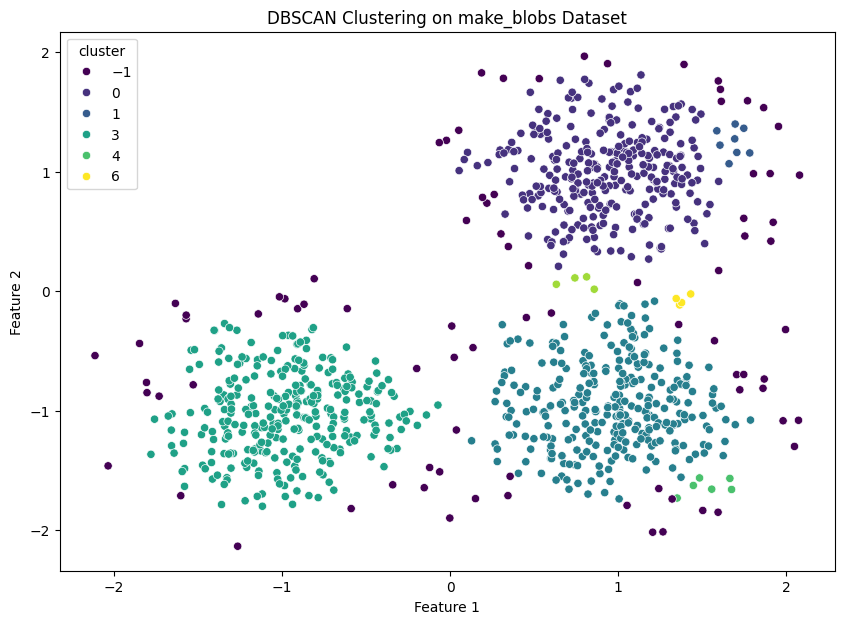

In [ ]:
center_num=3          # center_num = [[1, 1], [-1, -1], [1, -1]]
c_std=0.3
X, y = make_blobs(n_samples=1000, centers=center_num, cluster_std=c_std, random_state=0)

# noise_num=50
# np.random.seed(42)
# noise = np.random.uniform(low=-3, high=3, size=(noise_num, 2))
# X = np.concatenate([X, noise])
# y = np.concatenate([y, [-1]*noise_num])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

blobs_df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
blobs_df['cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
else:
    silhouette_avg = -1

davies_bouldin = davies_bouldin_score(X_scaled, dbscan.labels_)
mask = dbscan.labels_ != -1
nmi = normalized_mutual_info_score(y[mask], dbscan.labels_[mask])
ari = adjusted_rand_score(y[mask], dbscan.labels_[mask])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Normalized Mutual Information (NMI): {nmi}')
print(f'Adjusted Rand Index (ARI): {ari}')

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

plt.figure(figsize=(10, 7))
sns.scatterplot(x=blobs_df['feature_1'], y=blobs_df['feature_2'], hue=blobs_df['cluster'], palette='viridis')
plt.title('DBSCAN Clustering on make_blobs Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## DBSCAN EX2 (generate dataset by make_blobs)

In [ ]:
X, y = make_blobs(n_samples=1000, centers=6, n_features=5, cluster_std=1.0, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X_scaled)

blobs_df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
blobs_df['cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
else:
    silhouette_avg = -1

davies_bouldin = davies_bouldin_score(X_scaled, dbscan.labels_)

mask = dbscan.labels_ != -1
nmi = normalized_mutual_info_score(y[mask], dbscan.labels_[mask])
ari = adjusted_rand_score(y[mask], dbscan.labels_[mask])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Normalized Mutual Information (NMI): {nmi}')
print(f'Adjusted Rand Index (ARI): {ari}')

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')


Silhouette Score: 0.7220852107296466
Davies-Bouldin Index: 1.5861271510534027
Normalized Mutual Information (NMI): 0.9999999999999999
Adjusted Rand Index (ARI): 1.0
Number of clusters: 6
Number of noise points: 10


## DBSCAN EX3 (generate dataset by make_circles)

Silhouette Score: 0.11245542411715032
Davies-Bouldin Index: 892.1387795074369
Normalized Mutual Information (NMI): 1.0
Adjusted Rand Index (ARI): 1.0
Number of clusters: 2
Number of noise points: 0


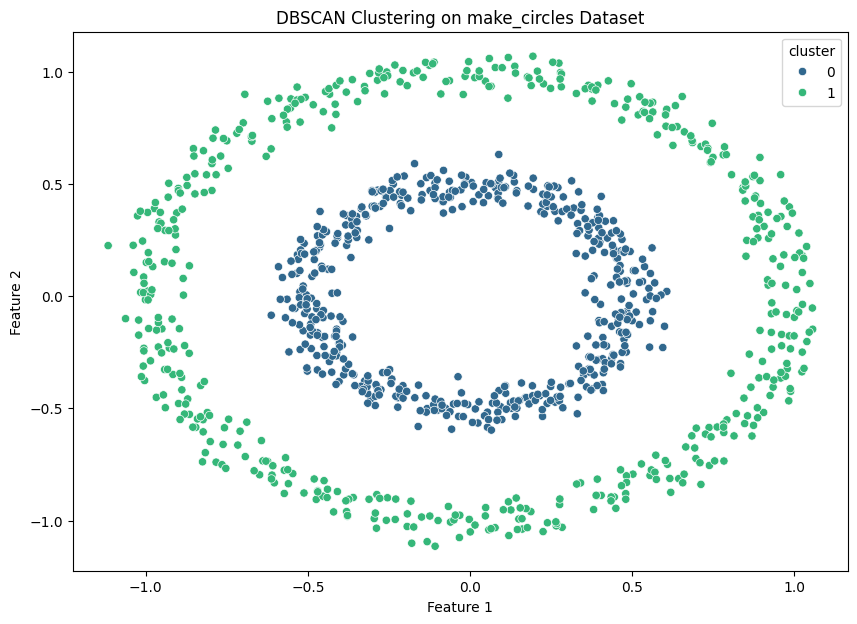

In [ ]:
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_scaled)

circles_df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
circles_df['cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
else:
    silhouette_avg = -1

davies_bouldin = davies_bouldin_score(X_scaled, dbscan.labels_)

mask = dbscan.labels_ != -1
nmi = normalized_mutual_info_score(y[mask], dbscan.labels_[mask])
ari = adjusted_rand_score(y[mask], dbscan.labels_[mask])


print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Normalized Mutual Information (NMI): {nmi}')
print(f'Adjusted Rand Index (ARI): {ari}')

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

plt.figure(figsize=(10, 7))
sns.scatterplot(x=circles_df['feature_1'], y=circles_df['feature_2'], hue=circles_df['cluster'], palette='viridis')
plt.title('DBSCAN Clustering on make_circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## DBSCAN EX4 (generate dataset by make_moons)

Silhouette Score: 0.2610827420001004
Davies-Bouldin Index: 2.1519930077310847
Normalized Mutual Information (NMI): 0.9894916293789005
Adjusted Rand Index (ARI): 0.9959555067782759
Number of clusters: 2
Number of noise points: 11


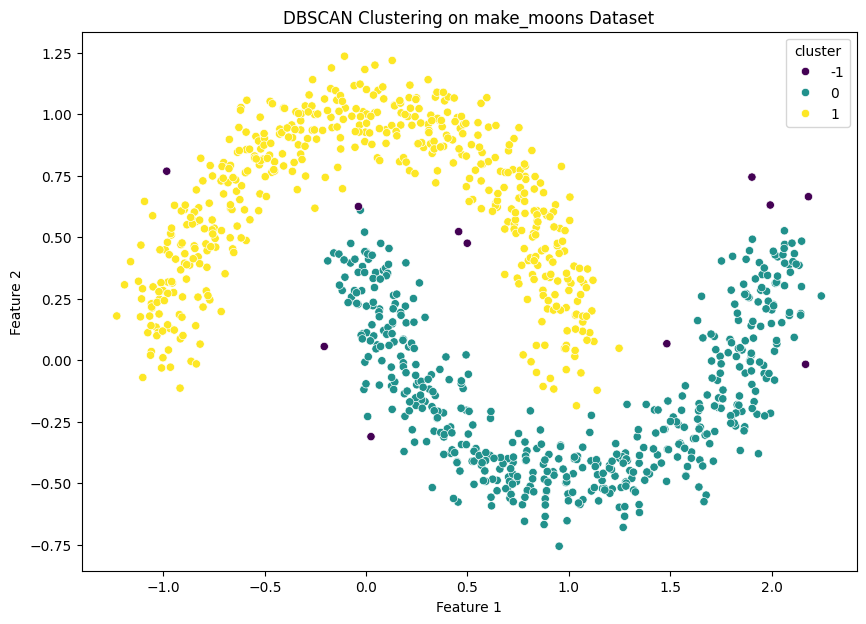

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_scaled)

moon_df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
moon_df['cluster'] = dbscan.labels_

if len(set(dbscan.labels_)) > 1:
    silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
else:
    silhouette_avg = -1

davies_bouldin = davies_bouldin_score(X_scaled, dbscan.labels_)

mask = dbscan.labels_ != -1
nmi = normalized_mutual_info_score(y[mask], dbscan.labels_[mask])
ari = adjusted_rand_score(y[mask], dbscan.labels_[mask])
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Normalized Mutual Information (NMI): {nmi}')
print(f'Adjusted Rand Index (ARI): {ari}')

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

plt.figure(figsize=(10, 7))
sns.scatterplot(x=moon_df['feature_1'], y=moon_df['feature_2'], hue=moon_df['cluster'], palette='viridis')
plt.title('DBSCAN Clustering on make_moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()